# Hands-on: Deciphering Inka Khipu Signs


In [1]:
#function that develops plot with 95% CI and then scatterplot overlayed with likelihood that expected values fit with data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_proportion_confint_digits(actual_first_digit_frequencies, 
                                         actual_first_digit_counts, 
                                         expected_first_digit_frequencies,
                                         label_actual,
                                         label_expected,
                                         title
                                        ):
    # Import function-specific package:
    from statsmodels.stats.proportion import multinomial_proportions_confint
    
    # Plot 95% CIs as lines with caps on the top and bottom for easier interpretation
    plt.figure(figsize=(9,5))

    (_, caps, _) = plt.errorbar(x=np.arange(1, 10, 1), 
                     y=actual_first_digit_frequencies, 
                     yerr=[(top-bot)/2 for top,bot in multinomial_proportions_confint(actual_first_digit_counts)],
                     capsize=5, fmt='none', label=label_actual+' 95% CI')

    for cap in caps:
        cap.set_markeredgewidth(1)

    # Plot expected values as scatter plot points, in order to visualize where CIs include expected values
    plt.scatter(np.arange(1,10,1), expected_first_digit_frequencies, label=label_expected, color='red')
    
    # Format 
    plt.xticks([1,2,3,4,5,6,7,8,9])
    plt.xlabel('First Digits')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend();
    
    return

In [2]:
#first look at census data to understand Benford's Law
population_df = pd.read_csv('Population_by_County_2010_Census.csv')

In [3]:
population_df.head()

,GEO.id,GEO.id2,Geography,Population
0,0500000US01001,1001,"Autauga County, Alabama",54571
1,0500000US01003,1003,"Baldwin County, Alabama",182265
2,0500000US01005,1005,"Barbour County, Alabama",27457
3,0500000US01007,1007,"Bibb County, Alabama",22915
4,0500000US01009,1009,"Blount County, Alabama",57322


In [4]:
#don't care about counties, just want digits of population
population_size = population_df['Population']

In [5]:
#define function that returns first digit of number we feed into it
def first_digit(number):
    return int(str(number)[0]) #turn into string to isolate first element then turn back into integer

In [6]:
#apply to population_size
first_digits_population_size = population_size.apply(first_digit)

In [8]:
first_digits_population_size.head()

0    5
1    1
2    2
3    2
4    5
Name: Population, dtype: int64

In [10]:
#figure out frequencies in form of proportion #value_counts returns counts for each individual element
first_digit_frequencies = first_digits_population_size.value_counts()/len(first_digits_population_size)
#sort index so ordered from numbers 1 -9 
first_digit_frequencies.sort_index(inplace = True)
first_digit_frequencies

1    0.303310
2    0.189052
3    0.119032
4    0.098027
5    0.067791
6    0.066836
7    0.057925
8    0.048377
9    0.049650
Name: Population, dtype: float64

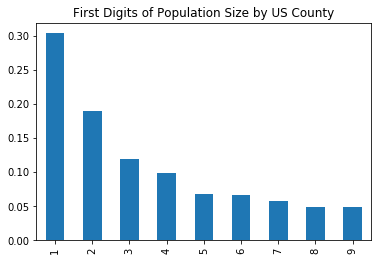

In [11]:
#now plot!
first_digit_frequencies.plot(kind = 'bar', title = 'First Digits of Population Size by US County');

Pandas does not allow axis labeling with plot function - need to use plt

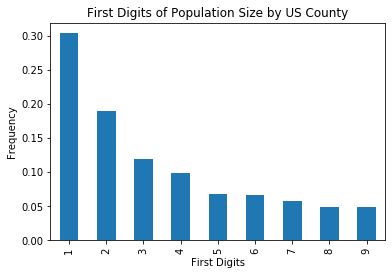

In [13]:
first_digit_frequencies.plot(kind = 'bar', title = 'First Digits of Population Size by US County');
plt.xlabel('First Digits')
plt.ylabel('Frequency');

In [21]:
#compare to benford's expected frequencies
expected_frequencies = pd.Series([.301, .176, .125, .097, .079, .067, .058, .051, .046], 
                                 index = [1, 2, 3, 4, 5, 6, 7, 8, 9])
#combine into dataframe with population size frequencies
freqs = pd.DataFrame([first_digit_frequencies, expected_frequencies]).T #.T to transpose so digit numbers are on rows
freqs.columns = ['Actual', 'Expected'] #rename columns
freqs

,Actual,Expected
1,0.303310,0.301
2,0.189052,0.176
3,0.119032,0.125
4,0.098027,0.097
5,0.067791,0.079
6,0.066836,0.067
7,0.057925,0.058
8,0.048377,0.051
9,0.049650,0.046


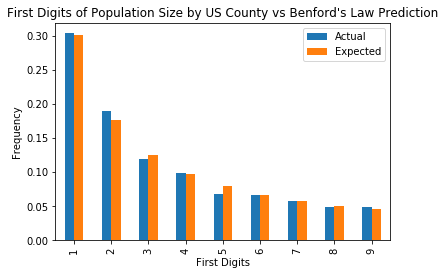

In [23]:
freqs.plot(kind = 'bar', title = 'First Digits of Population Size by US County vs Benford\'s Law Prediction');
plt.xlabel('First Digits')
plt.ylabel('Frequency');

In [24]:
#chi-square test to check if divergence
from scipy.stats import chisquare
actual_counts = first_digits_population_size.value_counts()
expected_counts = expected_frequencies*len(first_digits_population_size)
chisquare(actual_counts, f_exp = expected_counts)

Power_divergenceResult(statistic=9.522569120793193, pvalue=0.3001453330051994)

Not statistically significant difference - but what about the specific proportions?

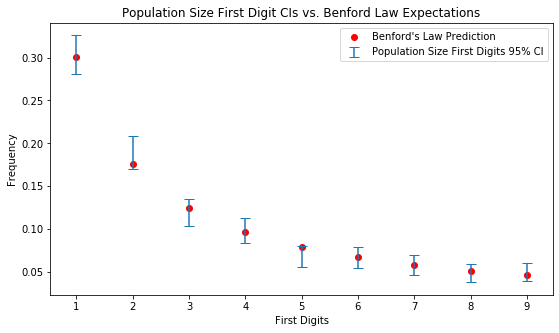

In [26]:
#use previously made function
plot_multi_proportion_confint_digits(actual_first_digit_frequencies = first_digit_frequencies, 
                                    actual_first_digit_counts = actual_counts,
                                    expected_first_digit_frequencies = expected_frequencies,
                                    label_actual = 'Population Size First Digits',
                                    label_expected = 'Benford\'s Law Prediction',
                                    title = 'Population Size First Digit CIs vs. Benford Law Expectations'
                                    )

Multionomial 95% CIs adjusted so not influencing significance of any individual value based on population significance.
2 is a little high and 5 is right on the edge, maybe even a little over
overall values are in line with Benford's law

# Khipus!

Want to test whether first digit distribution in khipus adheres to benford's law

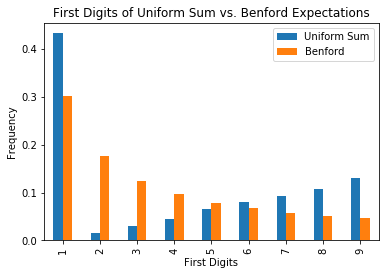

In [27]:
#using numpy - set random seed so that it always produces same simulation so when debugging not confused
np.random.seed(0)
uniform_sum = np.random.randint(1, 9, 10000) + np.random.randint(1, 9, 10000) #sum of two random variables ten thousand times

#to assess with benford's law, need to get first digits
first_digit_uniform = pd.Series(uniform_sum).apply(first_digit) #numpy has own objects so need to transform into pandas series
uniform_first_digit_frequencies = first_digit_uniform.value_counts()/len(first_digit_uniform)
uniform_first_digit_frequencies.sort_index(inplace=True)

freqs_expected_distributions = pd.DataFrame([uniform_first_digit_frequencies, expected_frequencies]).T
freqs_expected_distributions.columns = ['Uniform Sum', 'Benford']
freqs_expected_distributions.plot(kind='bar', title ='First Digits of Uniform Sum vs. Benford Expectations');
plt.xlabel('First Digits')
plt.ylabel('Frequency');

non-numerical distribution vs. empirical numerical distribution

In [28]:
khipu_cords = pd.read_pickle('khipu_cords.pkl')
khipu_cords.tail()

,Unnamed: 0,Khipu,Cord,Fiber,Value,Colors,Spin_Ply,Attachment,Termin,Length,Anomalous
56822,3146,UR294,1,CN,100,LB,Z,V,K,34.5,False
56823,3147,UR294,2,CN,22,MB,Z,V,B,22.5,False
56824,3148,UR294,3,CN,65,NB,Z,V,K,17.5,False
56825,3149,UR294,4,CN,52,W,Z,V,K,23.0,False
56826,3150,UR294,5,CN,0,MB\t (0-23) \r\nMB:W:BG\t (23-27) \r\nMB\t (27...,Z,V,K,40.5,False


In [30]:
#get first digits of values of anomalous khipu cords
first_digits_anomalous = khipu_cords[khipu_cords['Anomalous'] != False]['Value'].apply(first_digit)
#get first digits of values of normal khipu cords
first_digits_normal = khipu_cords[khipu_cords['Anomalous'] == False]['Value'].apply(first_digit)
#drop cords with no knots (value = 0)
first_digits_anomalous = first_digits_anomalous[first_digits_anomalous != 0]
first_digits_normal = first_digits_normal[first_digits_normal != 0]

In [32]:
#find frequencies
anomalous_first_digits_frequencies = first_digits_anomalous.value_counts()/len(first_digits_anomalous)
anomalous_first_digits_frequencies.sort_index(inplace=True)
normal_first_digits_frequencies = first_digits_normal.value_counts()/len(first_digits_normal)
normal_first_digits_frequencies.sort_index(inplace=True)

In [34]:
freqs_cord_values = pd.DataFrame([anomalous_first_digits_frequencies,
                                 normal_first_digits_frequencies,
                                 expected_frequencies,
                                 uniform_first_digits_frequencies]).T
freqs_cord_values.columns = ['Anomalous', 'Normal', 'Expected (Benford)', 'Expected (Uniform Sum)' ]

NameError: name 'uniform_first_digits_frequencies' is not defined